In [1]:
%run init_notebookspace.py
from settings import DATA_DIR, MODEL_DIR

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\memoire1\data


In [3]:
%matplotlib inline

from gEconpy.classes.model import gEconModel
from gEconpy.plotting import plotting as gp

import matplotlib.pyplot as plt
import seaborn as sns
from src.plotting import plot_dfs

import numpy as np
import pandas as pd

import os

load model

In [43]:
from config import mod7_params
mod = gEconModel(os.path.join(MODEL_DIR, 'gEconpy_mod7_1.gcn'), verbose=True)

Model Building Complete.
Found:
	25 equations
	25 variables
	The following variables were eliminated at user request:
		U_t
	The following "variables" were defined as constants and have been substituted away:
		B_t
	1 stochastic shock
		 1 / 1 have a defined prior. 
	13 parameters
		 1 / 13 have a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [44]:
mod.variables

[A_t,
 C_t,
 I_t,
 Kd_t,
 Ks_t,
 L_d_t,
 Ld_t,
 Ls_t,
 P_hat_t,
 P_t,
 Pi_t,
 Q_t,
 R_b_t,
 R_k_t,
 TC_t,
 Y_t,
 f_t,
 g_t,
 lambda_t,
 mc_t,
 pi_t,
 pi_w_t,
 q_t,
 w_hat_t,
 w_t]

In [45]:
# assign parameters
mod.free_param_dict.update(mod6_params)
mod.free_param_dict

{'Theta': 0.75,
 'Theta_w': 0.75,
 'alpha': 0.35,
 'beta': 0.985,
 'delta': 0.025,
 'gamma_pi': 0.1,
 'gamma_r': 0.1,
 'gamma_y': 0.1,
 'psi': 8,
 'psi_w': 21,
 'rho_A': 0.95,
 'sigma_C': 1,
 'sigma_L': 1}

Investigate priors

Solve

In [46]:
%time mod.steady_state()

TypeError: _lambdifygenerated() missing 1 required positional argument: 'w_ss'

In [32]:
# steady state values
mod.print_steady_state()

A_ss               1.000
C_ss               0.544
I_ss               0.028
Kd_ss              1.139
Ks_ss              1.139
L_d_ss             0.098
Ld_ss              0.395
Ls_ss              0.395
P_hat_ss           1.842
P_ss               1.842
Pi_ss              0.814
Q_ss               1.842
TC_ss             -0.241
Y_ss               0.573
f_ss               0.378
g_ss               1.612
lambda_ss          0.998
mc_ss              0.421
pi_ss              1.000
pi_w_ss            1.000
q_ss               1.838
r_ss               0.074
w_hat_ss           0.396
w_ss               0.396


In [33]:
mod.solve_model(solver="gensys")

[0, 1, 0]
Norm of deterministic part: 0.977491574
Norm of stochastic part:    0.977491574


In [34]:
mod.check_bk_condition()
;

Model solution has 6 eigenvalues greater than one in modulus and 5 forward-looking variables.
Blanchard-Kahn condition is satisfied.


''

In [35]:
# policy matrix
for name, policy_matrix in zip(["T", "R"], [round(mod.T, 5), round(mod.R, 5)]):
    print(name.center(10).center(50, "="))
    print(policy_matrix.to_string())

====================    T     ====================
              A    C    I   Kd       Ks  L_d   Ld   Ls         P  P_hat   Pi    Q   TC    Y    f    g  lambda   mc   pi  pi_w    q    r         w  w_hat
A       0.94927  0.0  0.0 -0.0  0.00025  0.0 -0.0 -0.0  -0.02703   -0.0  0.0  0.0 -0.0  0.0  0.0 -0.0    -0.0  0.0  0.0   0.0 -0.0 -0.0   0.00000    0.0
C       0.77989 -0.0  0.0 -0.0  0.39616  0.0 -0.0 -0.0  -0.67053   -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0     0.0  0.0  0.0   0.0  0.0 -0.0  -0.00000    0.0
I       5.56511  0.0  0.0 -0.0 -0.86954  0.0 -0.0 -0.0 -62.73608   -0.0  0.0  0.0 -0.0  0.0  0.0 -0.0    -0.0  0.0  0.0   0.0 -0.0 -0.0   0.00000    0.0
Kd      0.13866 -0.0  0.0 -0.0  0.95342  0.0 -0.0 -0.0  -1.58588   -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0     0.0  0.0  0.0   0.0  0.0 -0.0   0.00000    0.0
Ks      0.13900 -0.0  0.0 -0.0  0.95331  0.0 -0.0 -0.0  -1.57320   -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0     0.0  0.0  0.0   0.0  0.0 -0.0   0.00000    0.0
L_d     8.30362  0.0  0.0 -0.0 

Model stats

In [36]:
_plot_vars = ['A', 'C', 'I', 'Kd', 'Ld', 'P', 'P_hat', 'Pi', 'Y', 'pi', 'r', 'w']

''

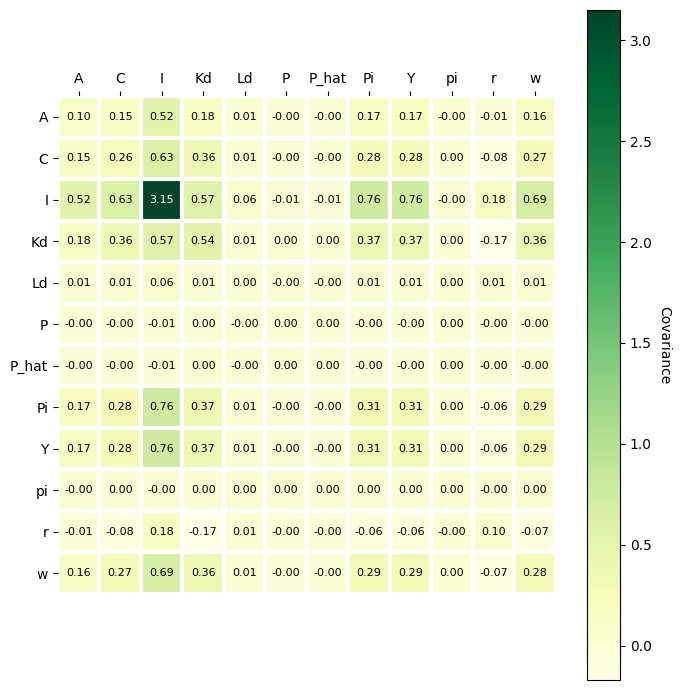

In [37]:
scov = mod.compute_stationary_covariance_matrix()
gp.plot_covariance_matrix(scov,
                          _plot_vars,
                         figsize=(7,7))
;

''

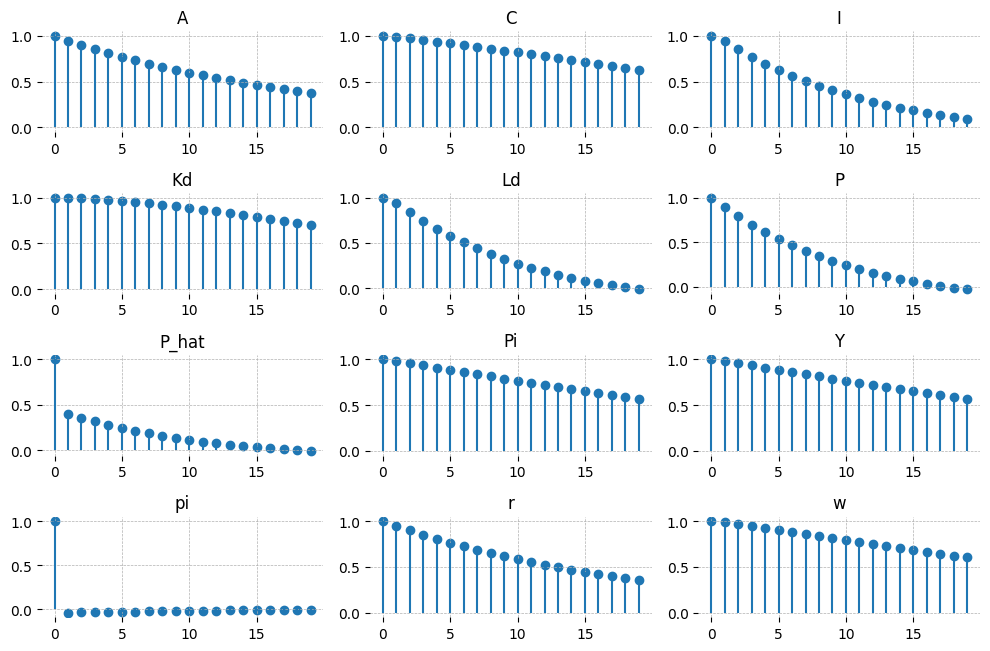

In [38]:
acorr = mod.compute_autocorrelation_matrix(n_lags=20)
gp.plot_acf(acorr, _plot_vars, n_cols=3, figsize=(10, 8))
;

IRF

In [39]:
irf = mod.impulse_response_function(simulation_length=20, shock_size=1.0)
_irf = irf.copy().unstack().loc[:, "epsilon_A"].unstack()

_irf['r/p'] = _irf.r / _irf.pi
_irf['w/p'] = _irf.r / _irf.pi

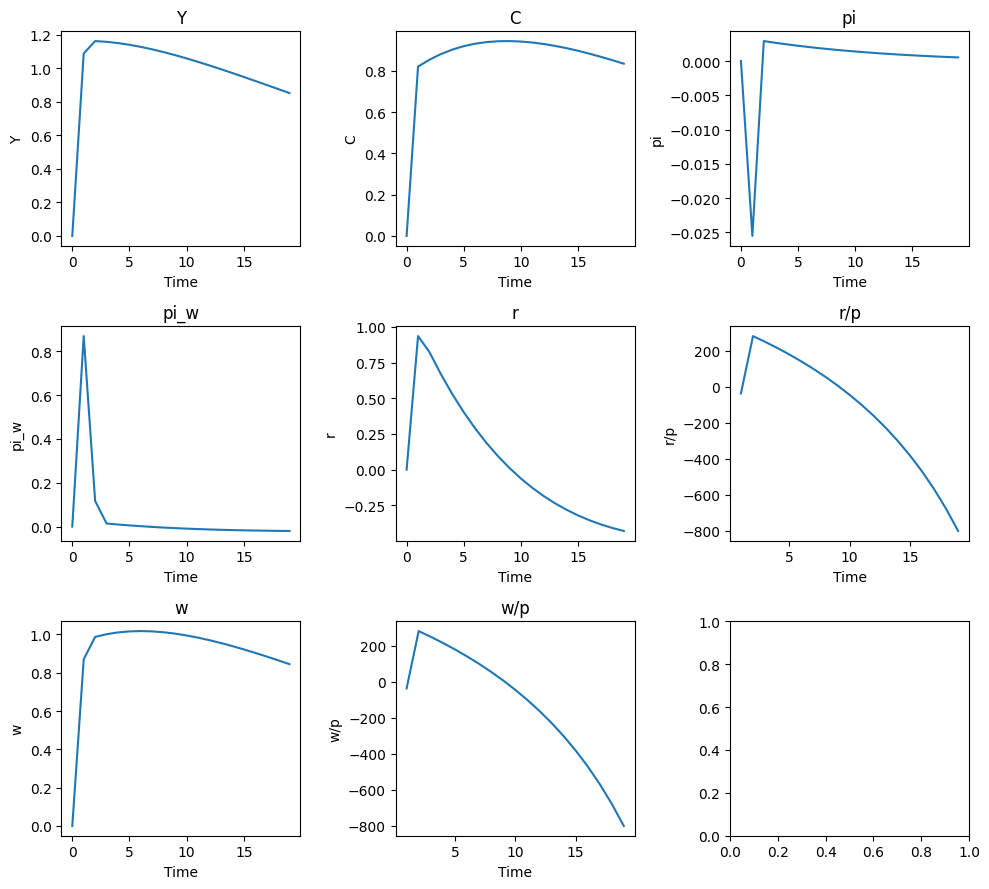

In [40]:
plot_dfs(_irf[['Y', 'C', 'pi', 'pi_w', 'r', 'r/p', 'w', 'w/p']], sns.lineplot, figsize=(10, 3))